# Analysis of Clinical Data

In [2]:
# %% [markdown]
# # PCL-5 & BDI Longitudinal Analysis (REDCap)
# This script loads a REDCap export, computes PCL‑5 and BDI totals by timepoint,
# tidies to long format, summarizes, and produces publication-ready figures.

# %% Imports & configuration
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read the redcap data file
df = pd.read_csv("/Users/orduek/Library/CloudStorage/OneDrive-BGU/PTSD Cohort/data/clinical_data/PTSDCenter_DATA_2025-10-05_0954.csv")
df.head()

,record_id,redcap_event_name,redcap_survey_identifier,phq9_timestamp,phq_1,phq_2,phq_3,phq_4,phq_5,phq_6,...,pcl_5_12_last_month,pcl_5_13_last_month,pcl_5_14_last_month,pcl_5_15_last_month,pcl_5_16_last_month,pcl_5_17_last_month,pcl_5_18_last_month,pcl_5_19_last_month,pcl_5_20_last_month,pcl5_complete
0,35,t0__enrollment_cli_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,3.0,1.0,4.0,3.0,3.0,2.0,2
1,35,t0__enrollment_sr_arm_1,NaN,2025-03-04 17:04:08,1.0,2.0,2.0,3.0,3.0,3.0,...,2.0,2.0,2.0,3.0,1.0,4.0,3.0,3.0,2.0,2
2,35,t1_after_treatment_arm_1,NaN,2025-04-06 16:20:02,1.0,1.0,1.0,2.0,1.0,3.0,...,2.0,1.0,1.0,2.0,0.0,3.0,3.0,2.0,2.0,2
3,35,t2_30_days_from_tr_arm_1,NaN,2025-04-27 20:31:28,2.0,1.0,1.0,3.0,2.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,3.0,2.0,1.0,2
4,58,t0__enrollment_sr_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# list all columns
df.columns.tolist()

['record_id',
 'redcap_event_name',
 'redcap_survey_identifier',
 'phq9_timestamp',
 'phq_1',
 'phq_2',
 'phq_3',
 'phq_4',
 'phq_5',
 'phq_6',
 'phq_7',
 'phq_8',
 'phq_9',
 'phq_severity',
 'phq9_complete',
 'pcl5_timestamp',
 'pcl_5_occurance',
 'pcl_5_index_trauma',
 'pcl_5_time',
 'pcl_5_deathornot',
 'pcl_5_self_experience',
 'pcl_5_other',
 'pcl_5_cause_of_death',
 'pcl_5_1_last_month',
 'pcl_5_2_last_month',
 'pcl_5_3_last_month',
 'pcl_5_4_last_month',
 'pcl_5_5_last_month',
 'pcl_5_6_last_month',
 'pcl_5_7_last_month',
 'pcl_5_8_last_month',
 'pcl_5_9_last_month',
 'pcl_5_10_last_month',
 'pcl_5_11_last_month',
 'pcl_5_12_last_month',
 'pcl_5_13_last_month',
 'pcl_5_14_last_month',
 'pcl_5_15_last_month',
 'pcl_5_16_last_month',
 'pcl_5_17_last_month',
 'pcl_5_18_last_month',
 'pcl_5_19_last_month',
 'pcl_5_20_last_month',
 'pcl5_complete']

In [5]:
# summarise all pcl5_*_last_month columns into total pcl (per row)
# summarise to following columns: phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9' into phq_total
phq_cols = [col for col in df.columns if col.startswith("phq_")]
df['phq_total'] = df[phq_cols].sum(axis=1)  




In [6]:
# summarize all pcl_5_*_last_month columns into total pcl (per row)  make sure it takes start with pcl_5 and ends with last_month
pcl_cols = [col for col in df.columns if col.startswith("pcl_5_") and col.endswith("_last_month")]
df['pcl_total'] = df[pcl_cols].sum(axis=1)


In [7]:
df_clean = df[['record_id','redcap_event_name', 'pcl_total', 'phq_total']].copy()

In [8]:
df_clean

,record_id,redcap_event_name,pcl_total,phq_total
0,35,t0__enrollment_cli_arm_1,54.0,0.0
1,35,t0__enrollment_sr_arm_1,54.0,19.0
2,35,t1_after_treatment_arm_1,45.0,11.0
3,35,t2_30_days_from_tr_arm_1,43.0,12.0
4,58,t0__enrollment_sr_arm_1,0.0,0.0
5,66,t0__enrollment_cli_arm_1,70.0,0.0
6,66,t0__enrollment_sr_arm_1,70.0,16.0
7,66,t1_after_treatment_arm_1,67.0,16.0
8,68,t0__enrollment_sr_arm_1,62.0,25.0
9,68,t1_after_treatment_arm_1,48.0,17.0


In [9]:
# set record_id as categorical
df_clean['record_id'] = df_clean['record_id'].astype('category')
# rename redcap_event_name values to more readable timepoints
df_clean['timepoint'] = df_clean['redcap_event_name'].replace({'t0__enrollment_sr_arm_1': 'Baseline',
                                                               't05_1mo_wl_arm_1': 'WL_1 Month',
                                                               't1_after_treatment_arm_1': 'Post-Treatment',
                                                               't2_30_days_from_tr_arm_1': '30 Days Post',
                                                               't3_90_days_from_tr_arm_1': '90 Days Post'})
# keep only relevant columns
sr = df_clean[['record_id', 'timepoint', 'pcl_total', 'phq_total']].copy()
# drop all timepoints  who don't have organized name (i.e., t0__enrollment_cli_arm_1 and t7_2_yrs_arm_1)
sr = sr[sr['timepoint'].isin(['Baseline', 'WL_1 Month', 'Post-Treatment', '30 Days Post', '90 Days Post'])]

In [10]:
sr

,record_id,timepoint,pcl_total,phq_total
1,35,Baseline,54.0,19.0
2,35,Post-Treatment,45.0,11.0
3,35,30 Days Post,43.0,12.0
4,58,Baseline,0.0,0.0
6,66,Baseline,70.0,16.0
7,66,Post-Treatment,67.0,16.0
8,68,Baseline,62.0,25.0
9,68,Post-Treatment,48.0,17.0
11,69,Baseline,22.0,9.0
13,72,Baseline,0.0,14.0


In [11]:
# remove subject 69 (not a patients)
sr = sr[sr['record_id'] != 69]

In [12]:
# align baseline PCL-5 totals with available CLI measurements
target_ids = [58, 72, 74, 75]

cli_baseline = (
    df_clean.loc[
        (df_clean['record_id'].isin(target_ids)) &
        (df_clean['redcap_event_name'] == 't0__enrollment_cli_arm_1'),
        ['record_id', 'pcl_total']
    ]
    .dropna(subset=['pcl_total'])
    .set_index('record_id')['pcl_total']
)

baseline_mask = (sr['timepoint'] == 'Baseline') & (sr['record_id'].isin(cli_baseline.index))
sr.loc[baseline_mask, 'pcl_total'] = sr.loc[baseline_mask, 'record_id'].map(cli_baseline)

sr.loc[baseline_mask, ['record_id', 'timepoint', 'pcl_total']]

,record_id,timepoint,pcl_total
13,72,Baseline,54.0
18,74,Baseline,67.0
23,75,Baseline,62.0


In [13]:
sr

,record_id,timepoint,pcl_total,phq_total
1,35,Baseline,54.0,19.0
2,35,Post-Treatment,45.0,11.0
3,35,30 Days Post,43.0,12.0
4,58,Baseline,0.0,0.0
6,66,Baseline,70.0,16.0
7,66,Post-Treatment,67.0,16.0
8,68,Baseline,62.0,25.0
9,68,Post-Treatment,48.0,17.0
13,72,Baseline,54.0,14.0
15,72,Post-Treatment,48.0,19.0


In [14]:
# remove subject 58 and remove 30-days post for subject 75
sr = sr[~((sr['record_id'] == 58) | ((sr['record_id'] == 75) & (sr['timepoint'] == '30 Days Post')))]

sr

,record_id,timepoint,pcl_total,phq_total
1,35,Baseline,54.0,19.0
2,35,Post-Treatment,45.0,11.0
3,35,30 Days Post,43.0,12.0
6,66,Baseline,70.0,16.0
7,66,Post-Treatment,67.0,16.0
8,68,Baseline,62.0,25.0
9,68,Post-Treatment,48.0,17.0
13,72,Baseline,54.0,14.0
15,72,Post-Treatment,48.0,19.0
16,72,30 Days Post,44.0,12.0


In [15]:
# pivot the sr table to show pcl_total for each subject at each timepoint, make sure the times are organized coorrectly (baseline, post-treatment, 30-days post and 90 -days post)
sr_pivot = pd.pivot_table(
    sr,
    index='record_id',
    columns='timepoint',
    values='pcl_total',
    aggfunc='first'
).reindex(columns=['Baseline', 'Post-Treatment', '30 Days Post', '90 Days Post'])

sr_pivot

/var/folders/b9/lbb6xc5s5cbgvhhqy321k9th0000gn/T/ipykernel_85050/1508635456.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sr_pivot = pd.pivot_table(


timepoint,Baseline,Post-Treatment,30 Days Post,90 Days Post
record_id,,,,
35,54.0,45.0,43.0,NaN
66,70.0,67.0,NaN,NaN
68,62.0,48.0,NaN,NaN
72,54.0,48.0,44.0,NaN
74,67.0,56.0,61.0,NaN
75,62.0,23.0,NaN,NaN


/var/folders/b9/lbb6xc5s5cbgvhhqy321k9th0000gn/T/ipykernel_85050/3964994844.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for rid, grp in sr[sr['timepoint'].isin(timepoints)].groupby('record_id'):


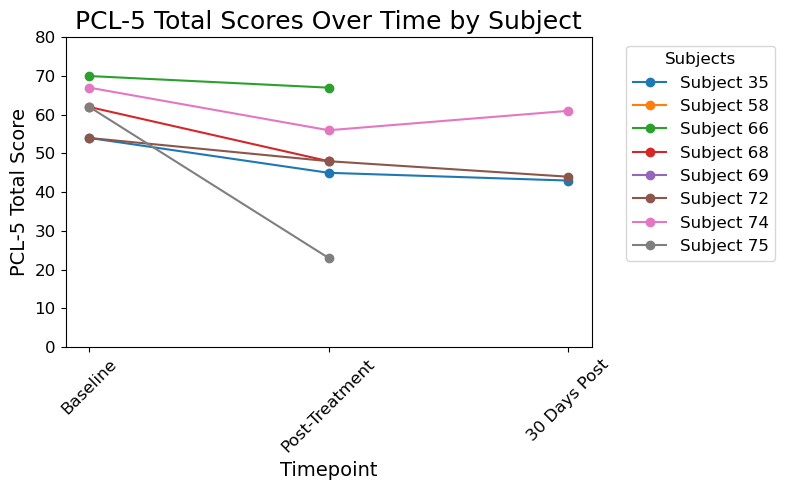

In [21]:
# create a line plot of sr showing each subject's pcl_total over timepoints, excluding 90 Days Post
# remove grid for clarity

plt.figure(figsize=(8, 5))
timepoints = ['Baseline', 'Post-Treatment', '30 Days Post']

# plot from sr to avoid dependency on later sr_pivot shape
for rid, grp in sr[sr['timepoint'].isin(timepoints)].groupby('record_id'):
    y = grp.set_index('timepoint').reindex(timepoints)['pcl_total'].values
    plt.plot(timepoints, y, marker='o', label=f'Subject {int(rid)}')

plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('PCL-5 Total Score', fontsize=14)
plt.title('PCL-5 Total Scores Over Time by Subject', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 80)
plt.grid(False)
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.savefig("pcl5_over_time_by_subject.png", dpi=300, bbox_inches='tight')
plt.show()

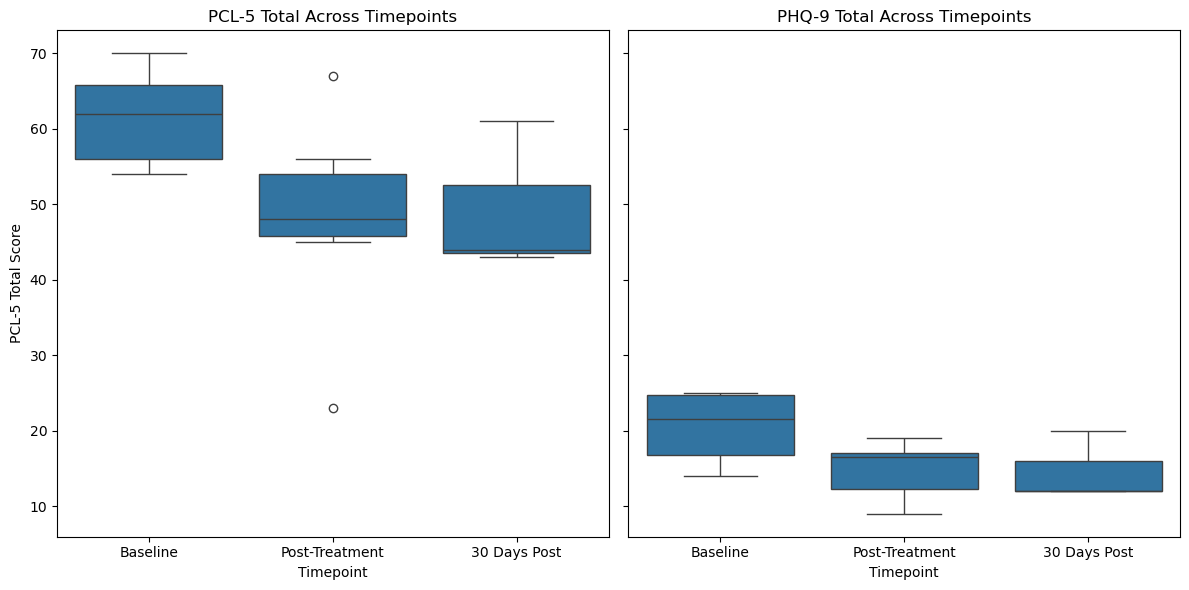

In [17]:
# plot pcl total across time and phq total across time (subplots)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.boxplot(x='timepoint', y='pcl_total', data=sr, ax=axes[0])
axes[0].set_title('PCL-5 Total Across Timepoints')
axes[0].set_xlabel('Timepoint')
axes[0].set_ylabel('PCL-5 Total Score')
sns.boxplot(x='timepoint', y='phq_total', data=sr, ax=axes[1])
axes[1].set_title('PHQ-9 Total Across Timepoints')
axes[1].set_xlabel('Timepoint')
axes[1].set_ylabel('PHQ-9 Total Score')
plt.tight_layout()
plt.show()

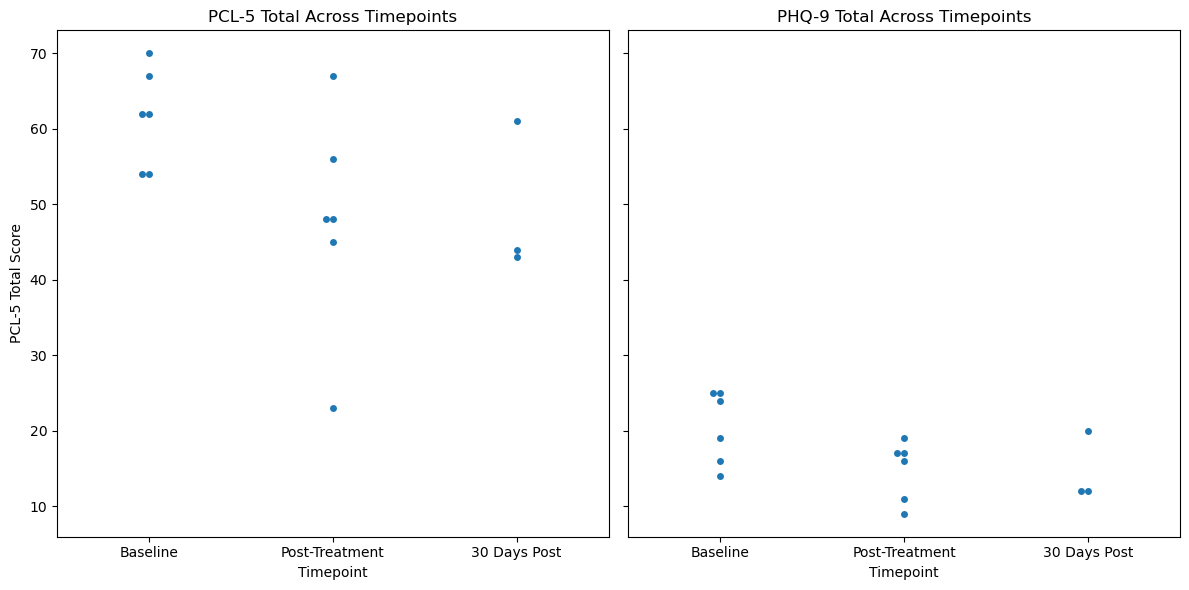

In [18]:
# do same plot but with swarmplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.swarmplot(x='timepoint', y='pcl_total', data=sr, ax=axes[0])
axes[0].set_title('PCL-5 Total Across Timepoints')
axes[0].set_xlabel('Timepoint')
axes[0].set_ylabel('PCL-5 Total Score')
sns.swarmplot(x='timepoint', y='phq_total', data=sr, ax=axes[1])
axes[1].set_title('PHQ-9 Total Across Timepoints')
axes[1].set_xlabel('Timepoint')
axes[1].set_ylabel('PHQ-9 Total Score')
plt.tight_layout()
plt.show()

In [19]:
# generate post - pre treatment pcl and phq columns by grabbing the pcl_total score at Post-Treatment and subtracting the pcl_total score at Baseline
# and same for phq_total. Do the same with 30 Days Post

# first pivot the data to have timepoints as columns
sr_pivot = sr.pivot(index='record_id', columns='timepoint', values=['pcl_total', 'phq_total']).reset_index()
# flatten the multiindex columns
sr_pivot.columns = ['_'.join(col).strip() if col[1] else col[0] for col in sr_pivot.columns.values]
# calculate the change scores
sr_pivot['pcl_change'] = sr_pivot['pcl_total_Post-Treatment'] - sr_pivot['pcl_total_Baseline']
sr_pivot['phq_change'] = sr_pivot['phq_total_Post-Treatment'] - sr_pivot['phq_total_Baseline']
# calculate 30 Days Post minus Baseline
sr_pivot['pcl_change_30d'] = sr_pivot['pcl_total_30 Days Post'] - sr_pivot['pcl_total_Baseline']
sr_pivot['phq_change_30d'] = sr_pivot['phq_total_30 Days Post'] - sr_pivot['phq_total_Baseline']


In [20]:
sr_pivot[['record_id', 'pcl_change', 'phq_change', 'pcl_change_30d', 'phq_change_30d']].to_csv("/Users/orduek/Library/CloudStorage/OneDrive-BGU/PTSD Cohort/data/clinical_data/PTSDCenter_PCL_PHQ_change_scores.csv", index=False)